## Topic Modelling using Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) in sklearn

#### IMPORTING MODULES

In [33]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk


# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

In [34]:
try:
    df = pd.read_csv("./Data/metoo_tweets_dec2017.csv",encoding= 'ISO-8859-1')

except Exception as e:
    print(e)
df = df.drop(['favorited', 'favoriteCount', 'replyToSN', 'replyToSID',
       'truncated', 'created', 'id', 'replyToUID',
       'statusSource','retweeted','isRetweet','retweetCount','screenName','longitude','latitude'], axis=1)

reindexed_data = df['text']
df.head()

,Unnamed: 0,text
0,1,American Harem.. #MeToo https://t.co/HjExLJdGuF
1,2,@johnconyersjr @alfranken why have you guys ...
2,3,Watched Megan Kelly ask Joe Keery this A.M. if...
3,4,Women have been talking about this crap the en...
4,5,.@BetteMidler please speak to this sexual assa...


#### LOADING THE DATASET

In [35]:
df.head()

,Unnamed: 0,text
0,1,American Harem.. #MeToo https://t.co/HjExLJdGuF
1,2,@johnconyersjr @alfranken why have you guys ...
2,3,Watched Megan Kelly ask Joe Keery this A.M. if...
3,4,Women have been talking about this crap the en...
4,5,.@BetteMidler please speak to this sexual assa...


We will drop the **'publish_date'** column as it is useless for our discussion.

In [36]:
df.head(10)

,Unnamed: 0,text
0,1,American Harem.. #MeToo https://t.co/HjExLJdGuF
1,2,@johnconyersjr @alfranken why have you guys ...
2,3,Watched Megan Kelly ask Joe Keery this A.M. if...
3,4,Women have been talking about this crap the en...
4,5,.@BetteMidler please speak to this sexual assa...
5,6,We can't keep turning a blind eye and pretend ...
6,7,Jay-Z is saying what I've been saying. DJT's j...
7,8,Where in the world is @MattLauer Celebrate #MeToo
8,9,@JoyAnnReid Keep it coming ladies! #MeToo
9,10,"@RepAdamSmith Workplace is one place, but what..."


#### DATA CLEANING & PRE-PROCESSING

Here I have done the data pre-processing. I have used the lemmatizer and can also use the stemmer. Also the stop words have been used along with the words wit lenght shorter than 3 characters to reduce some stray words.

In [37]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text
  
  

In [38]:
# time taking
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
df['text']=df['text'].apply(clean_text)


[nltk_data] Downloading package punkt to /home/dileep/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/dileep/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dileep/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
df.head()

,Unnamed: 0,text
0,1,American Harem MeToo http //t.co/HjExLJdGuF
1,2,johnconyersjr alfranken guy resigned Liberal h...
2,3,Watched Megan Kelly Keery A.M. finger hair ref...
3,4,Women talking crap entire time finally someone...
4,5,BetteMidler please speak sexual assault Gerald...


Can see the difference after removal of stopwords and some shorter words. aslo the words have been lemmatized as in **'calls'--->'call'.**

We can also see any particular news headline.

In [40]:
df['text'][0]

'American Harem MeToo http //t.co/HjExLJdGuF'

In [41]:
df.head(100)

,Unnamed: 0,text
0,1,American Harem MeToo http //t.co/HjExLJdGuF
1,2,johnconyersjr alfranken guy resigned Liberal h...
2,3,Watched Megan Kelly Keery A.M. finger hair ref...
3,4,Women talking crap entire time finally someone...
4,5,BetteMidler please speak sexual assault Gerald...
...,...,...
95,96,athlete Lai-yiu MeToo story go viral involving...
96,97,BetteMidler watched interview Barbara Walters ...
97,98,sure thered hashtag glad find bringanncurrybac...
98,99,Donald Trump Moron Intent Diminishing MeToo Mo...


#### EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )

In DTM the values are the TFidf values.

Also I have specified some parameters of the Tfidf vectorizer.

Some important points:-

**1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.**

**2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.**

**3) Default values for min_df & max_df worked well.**

**4) Can try different values for ngram_range.**

In [42]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...

In [43]:
vect_text=vect.fit_transform(df['text'])

#### We can now see the most frequent and rare words in the news headlines based on idf score. The lesser the value; more common is the word in the news headlines.

In [44]:
print(vect_text.shape)
print(vect_text)

(393135, 1000)
  (0, 157)	0.2197928336942459
  (0, 374)	0.21556371225049598
  (0, 509)	0.16322115094149653
  (0, 39)	0.9373271851935012
  (1, 383)	0.5368449649624393
  (1, 457)	0.49149772093489336
  (1, 328)	0.5062480791433753
  (1, 24)	0.4548778170092623
  (1, 509)	0.08382438706494565
  (2, 329)	0.7052057607120835
  (2, 427)	0.6740943014468278
  (2, 157)	0.1568751914722406
  (2, 374)	0.1538566934389037
  (3, 776)	0.42400630214183366
  (3, 274)	0.4508744301552446
  (3, 871)	0.2574594665042361
  (3, 239)	0.4709062660864485
  (3, 840)	0.44847323263303035
  (3, 956)	0.31089738965812425
  (3, 157)	0.11125107526857707
  (3, 374)	0.10911044902453364
  (3, 509)	0.08261656325918507
  (4, 402)	0.49035541748769446
  (4, 61)	0.35076893990516667
  (4, 741)	0.27641817257180895
  :	:
  (393131, 741)	0.25320291907921677
  (393131, 274)	0.5154237878217764
  (393131, 157)	0.12717831568854282
  (393131, 374)	0.12473122706868991
  (393131, 509)	0.09444434885607642
  (393132, 829)	0.6100101246879089
  (39

In [45]:
idf=vect.idf_

We can therefore see that on the basis of the **idf value** , **'police'** is the **most frequent** word while **'forecast'** is **least frequently** occuring among the news.

### TOPIC MODELLING

## Latent Semantic Analysis (LSA)

The first approach that I have used is the LSA. **LSA is basically singular value decomposition.**

**SVD decomposes the original DTM into three matrices S=U.(sigma).(V.T). Here the matrix U denotes the document-topic matrix while (V) is the topic-term matrix.**

**Each row of the matrix U(document-term matrix) is the vector representation of the corresponding document. The length of these vectors is the number of desired topics. Vector representation for the terms in our data can be found in the matrix V (term-topic matrix).**

So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. **We can then use these vectors to find similar words and similar documents using the cosine similarity method.**

We can use the truncatedSVD function to implement LSA. The n_components parameter is the number of topics we wish to extract.
The model is then fit and transformed on the result given by vectorizer. 

**Lastly note that LSA and LSI (I for indexing) are the same and the later is just sometimes used in information retrieval contexts.**

In [46]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)


In [47]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.32945626 -0.08050752  0.03109835 ... -0.03051883 -0.0184484
   0.00149281]
 [ 0.04304266  0.01613356  0.00385111 ...  0.01624287 -0.04866066
  -0.01108875]
 [ 0.18703371 -0.07737705  0.01839434 ... -0.04585603  0.04398609
   0.00759864]
 ...
 [ 0.20132686 -0.04808476  0.01805287 ... -0.01957195 -0.01464196
   0.00197029]
 [ 0.2328327  -0.06039634  0.02261401 ... -0.02495577 -0.01372801
   0.0059294 ]
 [ 0.16582309 -0.0073436  -0.03342896 ... -0.00389238 -0.01892806
  -0.00880756]]
(393135, 10)


In [48]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  32.945626208191506
Topic  1  :  -8.05075194531266
Topic  2  :  3.1098348362835666
Topic  3  :  0.7557746436376325
Topic  4  :  2.0541585689586728
Topic  5  :  0.10855324529423047
Topic  6  :  -1.4075139597579862
Topic  7  :  -3.05188349771481
Topic  8  :  -1.8448398869713716
Topic  9  :  0.14928064856473178


Similalry for other documents we can do this. However note that values dont add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [49]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00123935  0.01847752  0.00483044 ...  0.00219328  0.01598532
   0.00588648]
 [ 0.00512259  0.01877101  0.00059317 ...  0.00079254  0.03120818
   0.00316855]
 [ 0.00059285 -0.00489047  0.00012321 ... -0.00024827 -0.01225823
  -0.00236578]
 ...
 [ 0.00039781  0.01378663  0.00039248 ...  0.00107083  0.03586152
   0.00218909]
 [-0.00577387  0.0487867  -0.00367125 ...  0.00083804  0.07772861
   0.00016283]
 [-0.00723505 -0.07079487 -0.00149116 ... -0.0030071  -0.08754338
  -0.01569485]]


#### Now e can get a list of the important words for each of the 10 topics as shown. For simplicity here I have shown 10 words for each topic.

In [50]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
co http metoo movement woman sexual û_ time trump year 

Topic 1: 
woman sexual shout assault movement metoo laurenjauregui year story taranaburke 

Topic 2: 
shout laurenjauregui story beautiful outâ given strong using world refuse 

Topic 3: 
united states allegation president misconduct america full list alyssa_milano shout 

Topic 4: 
assault trumpsexprobe sexual funder victim believe trumpâ trump harassment agree 

Topic 5: 
rape culture one pain society made refuse confront woâ quiet 

Topic 6: 
woody dylan farrow allen revolution spared color created sengillibrand latimesopinion 

Topic 7: 
farrow dylan woody allen revolution spared metoo latimesopinion time nlnytndsry 

Topic 8: 
time person year co http magazine sexual funder silence harassment 

Topic 9: 
movement like interview gave comment asked atensnut value deemed know 



/home/dileep/Work_binghamton/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Latent Dirichlet Allocation (LDA)  

LDA is the most popular technique.**The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.**

**To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left fior now.**

To get an inituitive explanation of LDA checkout these blogs: [this](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)  ,  [this](https://tedunderwood.com/2012/04/07/topic-modeling-made-just-simple-enough/)  ,[this](https://en.wikipedia.org/wiki/Topic_model)  ,  [this kernel on Kaggle](https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial)  ,  [this](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/) .

In [51]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [52]:
lda_top=lda_model.fit_transform(vect_text)

In [53]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(393135, 10)
[[0.03943841 0.03943714 0.03943984 ... 0.03945428 0.03944208 0.0394373 ]
 [0.03253873 0.03253874 0.03253874 ... 0.03253985 0.03253892 0.03253871]
 [0.03717628 0.03717554 0.03717708 ... 0.03718385 0.03717802 0.0371757 ]
 ...
 [0.0328322  0.03283181 0.03283265 ... 0.03283682 0.4805196  0.03283185]
 [0.34139657 0.03589699 0.03589894 ... 0.03590812 0.03590057 0.0358971 ]
 [0.02728711 0.10846357 0.02728738 ... 0.18252802 0.15137681 0.13194891]]


In [54]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0000000000000002


#### Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document.

In [55]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  3.943840981784833 %
Topic  1 :  3.9437136873569796 %
Topic  2 :  3.943984264800536 %
Topic  3 :  3.9439796347725777 %
Topic  4 :  3.9440752834221153 %
Topic  5 :  3.9439440448426115 %
Topic  6 :  64.50309661079031 %
Topic  7 :  3.945428026496742 %
Topic  8 :  3.944207525486117 %
Topic  9 :  3.943729940247196 %


#### As we can see Topic 7 & 8 are dominantly present in document 0.

 

In [56]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[ 0.10001505  0.1000656   0.10000583 ...  0.1         0.10000002
   0.1       ]
 [ 0.10000008  0.10002994  0.10001572 ...  0.1         0.10022184
   0.1       ]
 [ 0.10000047  0.10001784  0.10000707 ...  0.1         0.10002724
   0.1       ]
 ...
 [23.98129213  0.10002487  0.1000097  ...  0.1         0.10899199
   0.1       ]
 [ 0.10000049  0.10003498  0.10000762 ...  0.1         0.10000001
   0.1       ]
 [ 0.10000923  0.10003062  0.10001625 ...  0.10140527  0.10573107
   0.1       ]]
(10, 1000)


#### Most important words for a topic. (say 10 this time.)

In [57]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
want msnbc http co silence hillaryclinton tapped metoo hire make 

Topic 1: 
believe trump stevebannen porn fire metoo world shout benshapiro using 

Topic 2: 
co http hertoo video haraâ powerful metooâ metoo precious entire 

Topic 3: 
2017 corey co http male youtube metoo right christmas like 

Topic 4: 
story metoo http co movement woman many liked girl everyone 

Topic 5: 
http thanks co metoo thank sexual itâ help shocking burke 

Topic 6: 
choose moment metoo co http lewandowski rape victim girl claim 

Topic 7: 
metoo co http ½í microsoft damon matt business might women 

Topic 8: 
http co metoo latest year time villa thought think look 

Topic 9: 
call voice proof good metoo walâ journalist real still people 



#### To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.

In [58]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

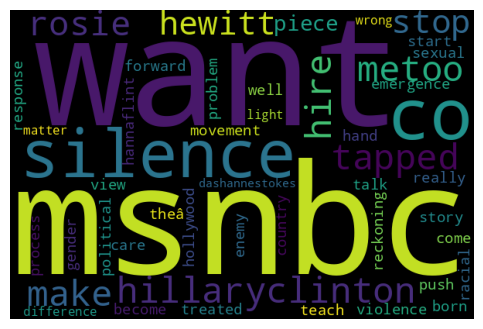

In [59]:
# topic 0
draw_word_cloud(0)

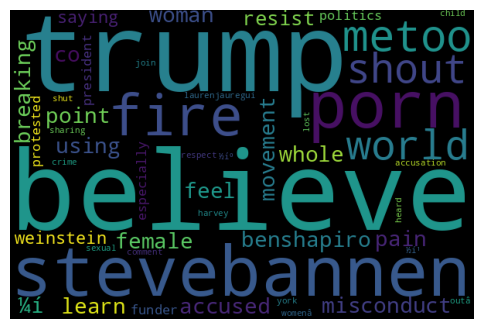

In [60]:
# topic 1
draw_word_cloud(1)  # ...

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


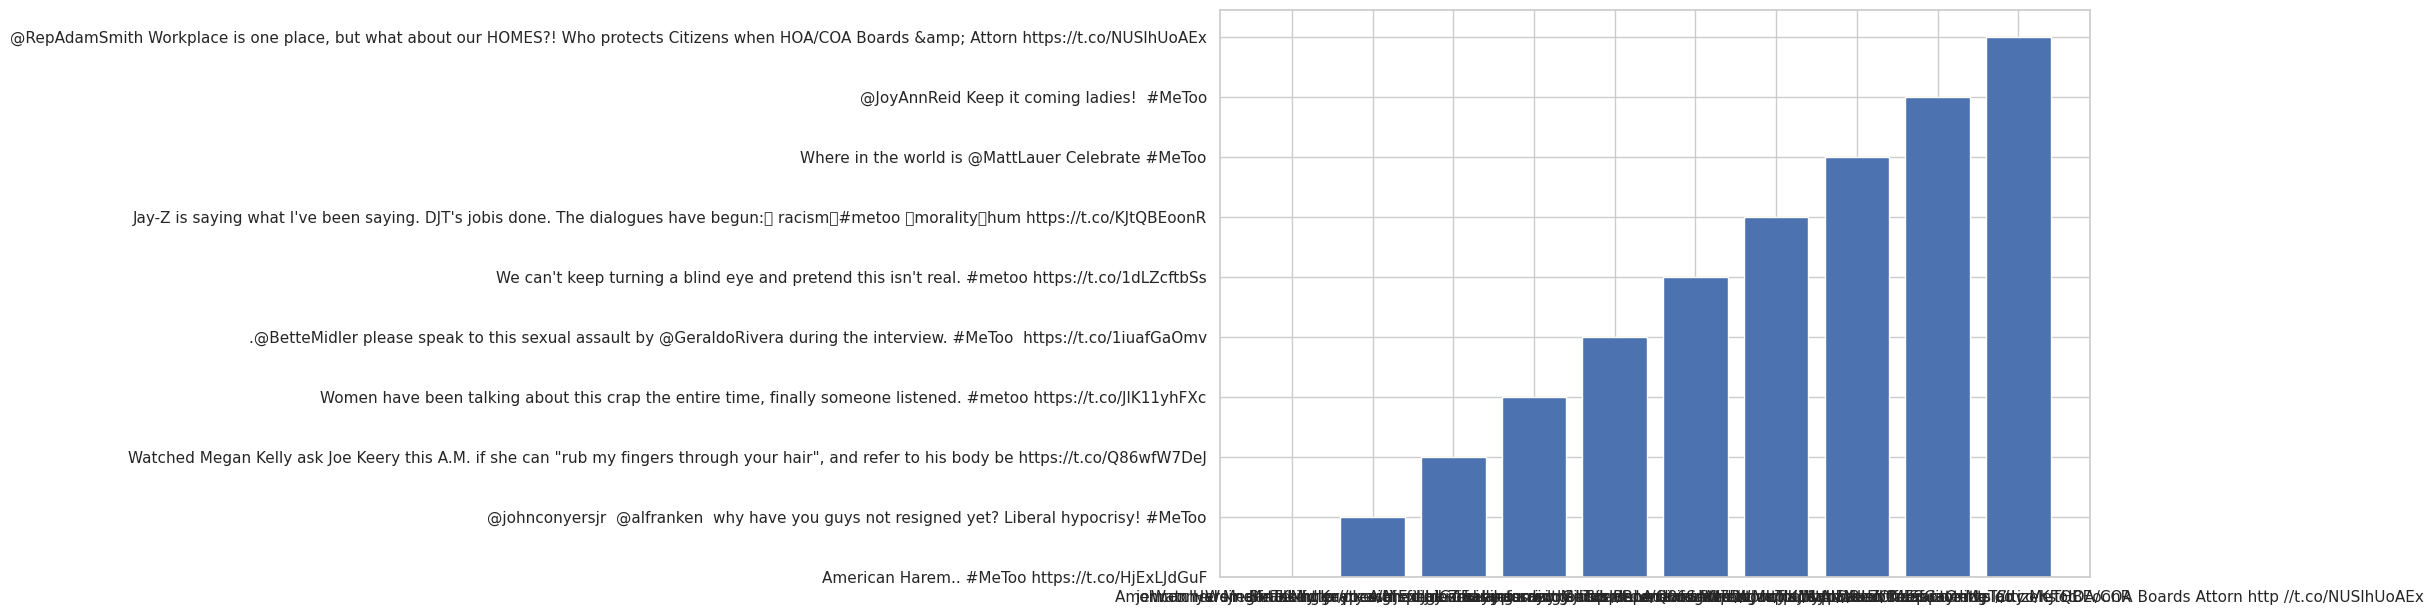

In [61]:
name = df['text'].head(1200)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:10], reindexed_data[0:10])
 
# Show Plot
plt.show()

## THE END !!!

## [Please star/upvote in case u liked it. ]

In [62]:
! pip install top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.0 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 5.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.32-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.7 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:000m eta 0:00:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 9.6 MB/s eta 0:00:000m eta 0:00:010:01:01
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=2504609 sha256=232706e6987e57f6bc1569bdb67a5d5b1bab51f79ce6ee83263cba462c9f44f2
  Stored 

In [78]:
from top2vec import Top2Vec

few_data = df.head(20000)
df_to_list = Top2Vec(list(few_data["text"].to_numpy()))
topic_sizes, topic_nums=df_to_list.get_topic_sizes()
topic_words, topic_scores, topic_nums=df_to_list.get_topics(10)
for words, scores, nums in zip(topic_words, topic_scores, topic_nums):
    print(nums)
    print(f"words:{words}")
    


2022-12-17 22:40:31,735 - top2vec - INFO - Pre-processing documents for training
2022-12-17 22:40:32,751 - top2vec - INFO - Creating joint document/word embedding
2022-12-17 22:41:25,038 - top2vec - INFO - Creating lower dimension embedding of documents
2022-12-17 22:41:44,796 - top2vec - INFO - Finding dense areas of documents
2022-12-17 22:41:59,968 - top2vec - INFO - Finding topics


0
words:['shut' 'business' 'rapist' 'fact' 'much' 'statement' 'company' 'democrat'
 'article' 'silence' 'reason' 'paper' 'metoomarchto' 'resist' 'help'
 'ijeomaoluo' 'days' 'go' 'attempt' 'settlement' 'face' 'vote' 'behind'
 'culture' 'black' 'love' 'person' 'want' 'trying' 'contrived' 'number'
 'mlauer' 'thanks' 'guy' 'claim' 'ever' 'dear' 'amazing' 'respect' 'night'
 'abuser' 'surprised' 'sign' 'anymore' 'what' 'change' 'your' 'instead'
 'america' 'move']
1
words:['paper' 'attempt' 'contrived' 'ijeomaoluo' 'silence' 'major' 'experience'
 'wrote' 'recent' 'shut' 'fear' 'medium' 'shadowingtrump' 'democracy'
 'statement' 'noconversion' 'unique' 'americans' 'churchtoo' 'sharing'
 'foreign' 'child' 'illegall' 'settlement' 'missionary' 'converted'
 'democrat' 'trying' 'move' 'ov' 'anymore' 'daily' 'vote' 'resist' 'uªve'
 'really' 'business' 'mandatory' 'petition' 'bill' 'screaming' 'number'
 'metoomarchto' 'come' 'option' 'eoaeb' 'petersweden' 'change' 'midler'
 'piece']
2
words:['obama' '